# Project 

## Introduction

This project involves three main tasks.Task 1 is designed to test whether friendship paradox is existed in a given event. Task 2 is designed to create a reinforcement learning, and then compete with smart players and naives as we designed in the PS11. Task 3 is designed to analyse the COVID-19 data in two sample countries, by processing the data and drawing the graphs, i found the difference in the data of the two countries and tried to find the possible answers.

## Task 1

Task description : Task 1 is designed to find whether the _friendship paradox_ is observed in the data given. Friendship paradox states that "most people have fewer friends than their friends have, on average". We use collaborators(persons who published paper together) to replace friend in this task. To find the relationship between the number of collaborators each author has and the average number of collaborators each author's collaborators have, i write codes  and plot some graphs as following.

Assumptions:
1. We only evaluate authors in statistic papers. "Statistics paper": We define a paper is "Statistics paper" with `'stat.'` in `'categories'`. 
2. "Collaborators": We assume two authors are collaborators if they have published any Statistics paper together based on the arXiv data. 



To complete this task, i show as below:
1. find the dict of lists of collaborators for each author
2. find the number of collaborators each author and put it into a new dict
3. find the average number of collaborators each author's collaborators have
4. compare, and see whether 'your' collaborators have more collaborators than 'you'
5. find the probability that 'your' collaborators have more collaborators than 'you'
6. conclude whether friend paradox is observed or not
7. use the histograms and boxplot to illustrate the data
8. find the author with highest number of collaborators and do some research 


Firstly, i import the modules which are needed for this task.

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Step 1: Find the dict of lists of collaborators for each author that has any collaborators

I will load the data in the '../data/arxiv-metadata-oai-snapshot.json' and find the specific authors who wrote statistic papers, and then put them all into a dict, each author will have a list of authors in the dict to represent the authors who cooperate with them. I use the dict name 'author_result' to represent the authors with their collaborators, also, a set named 'author_name' to represent all the authors name without duplication. 
Assumption of the author name:
1. order in 'last name, first name'
2. assume cases like ['Schofield Matthew R.', 'Schofield Matthew R'] as one person
3. assume cases like ['Kumar Ravinder', 'Kumar Ravi', 'Kumar Ravin'] as different persons as it is too difficult to evaluate whether each case like this is the same person or not


Assumption 2 and 3 is not satisfied initially and by cleaning the data, i get the final results which satisfy all the assumptions above.


In [97]:
# write your report here
file_name = '../data/arxiv-metadata-oai-snapshot.json'
author_name = set()
author_result = {}
with open(file_name, "r") as fp:
    for each_paper in fp:
        categories = json.loads(each_paper)["categories"]
        if "stat." in categories:
            author_list = json.loads(each_paper)["authors_parsed"]#load the data into a list
            authors = [i[0] + ' ' + i[1] for i in author_list] #combine the string to make the full name of the author.
            author, others = authors[0], list(set(authors) - {authors[0]})
            if author not in author_name:
                author_name.add(author)
                author_result[author] = others
            else:
                author_result[author].extend(others)
                author_result[author] = list(set(author_result[author]))
            for other in others:
                if other not in author_name:
                    author_name.add(other)
                    author_result[other] = [author]
                else:
                    author_result[other].extend([author])
                    author_result[other] = list(set(author_result[other]))#to remove duplications    


In [98]:
example = {}
for i,(k,v) in enumerate(author_result.items()):
    example[k] = v
    if i == 5:
        print(f'Some examples author and their collaborators:{example}')
        break

Some examples author and their collaborators:{'Wang Li': ['Wu Bingzhe', 'Zhong Li', 'Zhou Jun', 'Wong Hok Shing', 'Chen Qijian', 'Li Xinyi', 'Fang Wenjing', 'Carroll Raymond J.', 'Wang Guannan', 'Zhan Tianyu', 'Tan Mingkui', 'Yao Junlin', 'Kim Myungjin', 'Gao Lei', 'Yang Lijian', 'Du Qiang', 'Wen-Wei ', 'Xue Lan', 'Wang Jiangyan', 'Mao Qi', 'Zhang Bin', 'Chen Cen', 'Zhang Leihong', 'Lai Min-Jun', 'Wang Zitong', 'Zheng Longfei', 'Dong Yizhen', 'Li Ren-Cang', 'Gu Zhiling', 'Qu Annie', 'Tang Hongyao', 'Li Ren-cang', 'Shen Chungen', 'Wang Suojin', 'Chen Chaochao', 'Tao Yunzhe', 'Wang Yueying', 'Liu Feng', 'Ma Shujie', 'Zhang Lei-Hong', 'Yu Shan', 'Liu Wei', 'Liu Xiang', 'Liang Hua'], 'Yang Lijian': ['Wang Li', 'Wang Jiangyan', 'Yu Shan'], 'Mathai A. M.': ['Haubold H. J.'], 'Haubold H. J.': ['Saxena R. K.', 'Mathai A. M.'], 'Saxena R. K.': ['Haubold H. J.'], 'Allais Olivier': ['Tressou Jessica']}


### Step 2:  Find the number of collaborators of each author

By using the dict above, i use a for loop to find the number of collaborators each author has and put the figure into another dict named collaborators. If the author doesn’t any have any collaborator, he/she will have a zero. 

In [99]:
collaborators = {}
for author in author_result:
    collaborators[author] = len(author_result[author])

In [100]:
example = {}
for i,(k,v) in enumerate(collaborators.items()):
    example[k] = v
    if i == 5:
        print(f'Some examples of number of collaborators shown:{example}')
        break

Some examples of number of collaborators shown:{'Wang Li': 44, 'Yang Lijian': 3, 'Mathai A. M.': 1, 'Haubold H. J.': 2, 'Saxena R. K.': 1, 'Allais Olivier': 1}


### Step 3: Find out the average number of collaborators of each author's collaborators

By using the dict in step 1 and 2, first, i wrote a function to find the average collaborators the author's collaborators have named 'average_collaborators'. I used assertion to check whether the number of collaborators is not negative and use try and except to check whether there are some errors or exceptions existed during execution. Then for each author in the dict, i used a new dict named 'aver_collaborators' to put the number of average collaborators his/her collaborators have. And also, another dict name 'self_and_average_collaborators' to help the comparsion in next step with each author's number of collaborators in first place.

In [103]:
def average_collaborators(the_author):
    '''
    average_collaborators is used to find the average number of collaborators the given author's collaborators have
    the_author : string
    Return: float, average number of collaborators
    '''
    assert collaborators[the_author] >= 0, "The author must not have negative number of collaborators."
    try:
        if collaborators[the_author] != 0:
            num_collaborators = 0
            for collaborator in author_result[the_author]:
                num_collaborators += collaborators[collaborator]
            assert num_collaborators >= 0, "The total number of collaborators the author's collaborators has must be positive."            
            return num_collaborators/len(author_result[the_author])
        else:
            return 0
    except KeyError:
        raise KeyError('The author given is not in the dict.')
    except:
        raise Exception('The function does not work on your computer.')
    

aver_collaborators = {}
self_and_average_collaborators ={}
for author in author_result:
    aver_collaborators[author] = []
    self_and_average_collaborators[author] = []
    aver_collaborators[author] = (average_collaborators(author))
    self_and_average_collaborators[author] = [collaborators[author], average_collaborators(author)]

In [104]:
example = {}
for i,(k,v) in enumerate(self_and_average_collaborators.items()):
    example[k] = v
    if i == 5:
        print(f'Some examples of number of self and average collaborators shown:{example}')
        break

Some examples of number of self and average collaborators shown:{'Wang Li': [44, 8.681818181818182], 'Yang Lijian': [3, 18.0], 'Mathai A. M.': [1, 2.0], 'Haubold H. J.': [2, 1.0], 'Saxena R. K.': [1, 2.0], 'Allais Olivier': [1, 1.0]}


### Step 4: Compare the number of collaborators of each author and the average number of his/her collaborators

Then i compare the number of each author's collaborators and the average number of his/her collaborators. In the for loop, i have some assumptions:
1. if the author has 0 collaborator, the default view is his/her friends don't have more friends than him/her.
2. if the author has 5 collaborator, for example, as i used '/' above, even if the average number of friends of his/her friends have is 5 as well, 5.0 will be shown, so the default view is his/her friends have more friends than him/her(as mathematically speaking, 5.0 > 5, for the computer, 5.0 > 5 as well) 
3. I assume if over 50% of the authors' friends have more friends than themselves, then the friendship paradox is observed, v.v.

In [105]:
num_fewer_collaborators = 0
for author in self_and_average_collaborators:
    if self_and_average_collaborators[author][1] > self_and_average_collaborators[author][0]:
        num_fewer_collaborators += 1
probability_of_fewer = num_fewer_collaborators/len(author_result)
print(f"The probability of each author has fewer collaborators than his/her collaborators is equal to {probability_of_fewer}.")
if probability_of_fewer > 0.5:
    print("The friendship paradox is observed.")
else:
    print("The friendship paradox is not nobserved.")






The probability of each author has fewer collaborators than his/her collaborators is equal to 0.7770253610426207.
The friendship paradox is observed.


### Step 5: Use diagram illstration 

I first put the number of collaborators each author has in to an array, and then by using the matplotlib to show the histogram with Frequency(the frequency of number of collaborators occurs) as y-label and number of collaborators in the x-label. I name this graph 'Histogram of the collaborators (1)'

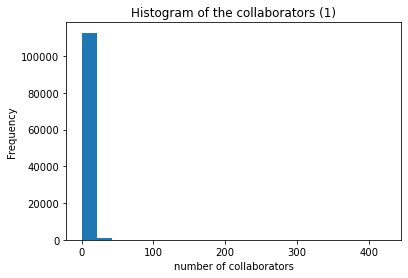

In [109]:
data = np.array([collaborators[author] for author in collaborators])
plt.hist(data, bins = 20)
plt.ylabel('Frequency')
plt.xlabel('number of collaborators')
plt.title('Histogram of the collaborators (1)')
plt.show()

Then i found this graph is really rough and there is loss of precision in the domain 0 to 50. To solve this question, i change the bins from 20 to 200 and make the graph preciser.

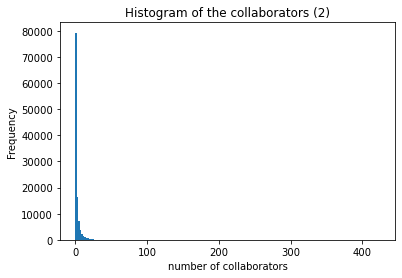

In [107]:
plt.hist(data, bins = 200)
plt.ylabel('Frequency')
plt.xlabel('number of collaborators')
plt.title('Histogram of the collaborators (2)')
plt.show()

Then i found the figure in the domain from 100 to 400 is nearly 0, which means the existence of outliers and some exceptions. Then i check the mean and standard deviation of the figure.

In [111]:
df = pd.DataFrame({'Number_of_collaborators':np.array([collaborators[author] for author in collaborators])})
print (f'The mean of the data is {df.Number_of_collaborators.mean()}.')

The mean of the data is 2.8038746037337092.


In [112]:
print (f'The standard deviation of the data is {df.Number_of_collaborators.std()}.')

The standard deviation of the data is 4.288220679659685.


I witness that the mean is nearly only 3, and the standard  deviation is 4.3(which is small), meaning that the figure is mainly concentrated in a specific range. So i remain the figure within +3/-3 standard deviation from the mean, we could see then the histogram is preciser and clearer.

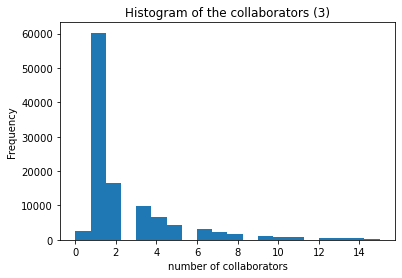

In [113]:
plt.hist(df[np.abs(df.Number_of_collaborators - df.Number_of_collaborators.mean()) <= (3*df.Number_of_collaborators.std())], bins = 20)
plt.ylabel('Frequency')
plt.xlabel('number of collaborators')
plt.title('Histogram of the collaborators (3)')
plt.show()

As the boxplot will make a better illustration of outliers and the concentration of the figure. I make a the boxplot as well, we could see clearly, almost all figures are in 0-100 and only a few over 100 and there is one over 400.

<AxesSubplot:>

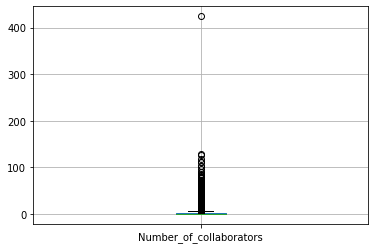

In [114]:
df = pd.DataFrame({'Number_of_collaborators':np.array([collaborators[author] for author in collaborators])})
df.boxplot()

Then we want to know who is the one has over 400 collaborators, we use max() and found the author.

In [120]:
print(f'{max(collaborators, key=collaborators.get)} has {max(collaborators[i] for i in collaborators)} collaborators, which is the highest.')

Bakas Spyridon has 424 collaborators, which is the highest.


### Research on Bakas Spyridon:
I found he is an assistant professor, who published a lot of paper in subjects  'Biomedical Image Analysis', 'Cancer Imaging', 'Radiogenomics', and 'Computational Pathology'. He has a lot of co-authors in these papers which justify my answers above.

### Cleaning the data

To see whether the data has similar name, i check first by using the loop to check in the 'author_name'.

In [116]:
count = 0
for i in author_name:
    similar_author = [i]
    for j in author_name:
        if j in i and i != j: #check whether there are similar names.
            similar_author.append(j)
    if len(similar_author) > 1:
        count += 1
        print(similar_author)
        if count > 20:
            break


['Russell Stuart J.', 'Russell Stuart']
['Owen Art B.', 'Owen Art']
['Wang Chuangqi', 'Wang Chu', 'Wang ', 'Wang Chuang']
['Jackson Christopher', 'Jackson Chris']
['Powers David M. W.', '. ']
['Chen Lingjiao', 'Chen Li', 'Chen Lingji', 'Chen Lin', 'Chen Ling', 'Chen ']
['Abbott L. F.', '. ']
['Coley Connor W.', 'Coley Connor']
['Taconeli C. A.', '. ']
['Ouarda Taha B. M. J.', '. ']
['Yu Kwang Min', 'Yu ']
['Peletier Mark A.', 'Peletier Mark']
['Rowley Henry A.', 'Rowley Henry']
['Li Jingtao', 'Li ', 'Li Jin', 'Li Jing']
['Alford Sharon M. H.', '. ']
['Fischer Matthias M.', 'Fischer Matthias']
['Moore Andrew W.', 'Moore Andrew']
['Venkatesan R. C.', '. ']
['Yu Hengyong', 'Yu ']
['Wang Bohan', 'Wang Bo', 'Wang ']
['Li Qunwei', 'Li ']


I found that there are a lot of similar names in it(i print all and found, although it didn't shown in the example.), like ['Kumar Ravinder', 'Kumar Ravi', 'Kumar Ravin'], it is too difficult to check each list of names and determine whether they are the same person or not. But there are some special cases, like ['Schofield Matthew R.', 'Schofield Matthew R'], ['Saul Lawrence K.', 'Saul Lawrence']. Clearly, they are the same person, so i modified the code above and do as following to put these special cases from two persons into one person.

In [117]:
author_name = set()
author_result = {}
with open(file_name, "r") as fp:
    for each_paper in fp:
        categories = json.loads(each_paper)["categories"]
        if "stat." in categories:
            author_list = json.loads(each_paper)["authors_parsed"]
            authors = [i[0] + ' ' + i[1] for i in author_list]
            author, others = authors[0], list(set(authors) - {authors[0]})
            if author not in author_name:
                if author.join('.') in author_name: # i create a new string by adding '.' to check whether 'author' +'.' is in the 'author name'
                    author_ = author.join('.')
                    author_result[author_].extend(others) # if it existed, make these two authors' collaborators into one's.
                    author_result[author_] = list(set(author_result[author_]))
                elif author.strip('.') in author_name: # i create a new string by deleting '.' to check whether 'author' - '.' is in the 'author name'
                    author_ = author.strip('.')
                    author_result[author_].extend(others)# if it existed, make these two authors' collaborators into one's.
                    author_result[author_] = list(set(author_result[author_]))
                else:
                    author_name.add(author)
                    author_result[author] = others
            else:
                author_result[author].extend(others)
                author_result[author] = list(set(author_result[author]))
            for other in others:
                if other not in author_name:
                    if other.join('.') in author_name:# same as above
                        other_ = other.join('.')
                        author_result[other_].extend([author])
                        author_result[other_] = list(set(author_result[other_])) 
                    elif other.strip('.') in author_name:
                        other_ = other.strip('.')
                        author_result[other_].extend([author])
                        author_result[other_] = list(set(author_result[other_])) 
                    else:
                        author_name.add(other)
                        author_result[other] = [author]
                else:
                    author_result[other].extend([author])
                    author_result[other] = list(set(author_result[other])) 
                    

In [118]:
example = {}
for i,(k,v) in enumerate(author_result.items()):
    example[k] = v
    if i == 5:
        print(f'Some examples author and their collaborators shown:{example}')
        break

Some examples author and their collaborators shown:{'Wang Li': ['Wu Bingzhe', 'Zhong Li', 'Zhou Jun', 'Wong Hok Shing', 'Chen Qijian', 'Li Xinyi', 'Fang Wenjing', 'Carroll Raymond J.', 'Wang Guannan', 'Zhan Tianyu', 'Tan Mingkui', 'Yao Junlin', 'Kim Myungjin', 'Gao Lei', 'Yang Lijian', 'Du Qiang', 'Wen-Wei ', 'Xue Lan', 'Wang Jiangyan', 'Mao Qi', 'Zhang Bin', 'Chen Cen', 'Zhang Leihong', 'Lai Min-Jun', 'Wang Zitong', 'Zheng Longfei', 'Dong Yizhen', 'Li Ren-Cang', 'Gu Zhiling', 'Qu Annie', 'Tang Hongyao', 'Li Ren-cang', 'Shen Chungen', 'Wang Suojin', 'Chen Chaochao', 'Tao Yunzhe', 'Wang Yueying', 'Liu Feng', 'Ma Shujie', 'Zhang Lei-Hong', 'Yu Shan', 'Liu Wei', 'Liu Xiang', 'Liang Hua'], 'Yang Lijian': ['Wang Li', 'Wang Jiangyan', 'Yu Shan'], 'Mathai A. M.': ['Haubold H. J.'], 'Haubold H. J.': ['Saxena R. K.', 'Mathai A. M.'], 'Saxena R. K.': ['Haubold H. J.'], 'Allais Olivier': ['Tressou Jessica']}


### Discussion of limitations and improvements

Limitations: 
1. The data has a lot of similar names, it is possible one person has two similar names in the paper and i assume he/she as two different persons
2. It is possible that the average number of your friends' friends is same as yours, but as i assume 5.0 is greater 5, so some mistakes present.
3. The figures are too huge to check accurately.
4. From the graph, we could not see each section clearly as the data is too huge for some part, so that we could only see a round relationship.
5. In this task, i assume if over 50% of the authors' friends have more friends than the authors themselves, the friend paradox exists, but this 50% is only my assumption. For this task i completed above, if i set 80%, the friend paradox is not observed, as my answer is 77.7%.


Improvements:
1. If the author's name is 90% similar to another person, we should assume them as the same person.
2. I could make number of collaborators of each author to one decimal place, for example, make 5 to 5.0. Then when the 5.0 is equal to 5.0, we not make it count.
3. I could pick small section of the data to check whether it is accurate or not.
4. I can separate each part, and then the graphs can be more clearly.


## Task 2

Task description: Task 2 is designed to be a continuation of PS11, which introduced a new class called LearningPlayer(). In this class, players will 'reward' the winning choices and "punish" the losing choices to make his/her choices more reasonable. Initially, like naive players, the players will random choose between 1, 2 and 3. However, unlike the naive players who assign equal probability to all 3 choices (1, 2, 3 sticks), the learning players increase the probability of selecting the winning choice and reduce the probability of the losing choice. Then, play the game for 1000 times as in PS11 by assigning one player-Learning player, another player- Smart player or Naive player, then we print the winning percentage of 2 players respectively to see whether the learning player is a good strategy.

Assumptions:
1. The game is designed for two players to take turns removing objects from some piles. On each turn, a player must remove at least one object. Often, the player who takes the last object loses the game.
2. There are 100 objects in the game.
3. A player is chosen randomly to start the game.
4. On each turn, each player must take 1, 2 or 3 sticks.
5. The game is player for 1000 times to evaluate the winning percentage of each player.
6. There are 3 types of players, one is naive, who pick randomly, one is smart player, who have a good strategy to avoid himself/herself falling into a losing position, the last one is learning player, who will remember who he/she has chosen and pick the one which is most likely to make himself/herself win.
7. The Learning player acts exactly as the naive except there is a _net_wins present to record his/her choices. (Here i want to mean that when there are smaller 5 objects left, he/she will still choose randomly.)
8. one function 'sim_play' is designed to call the class in nim.py and play for n times.

To complete this task, i show as below:
1. i import the nim.py in order to use the classes in it
2. i called  3 types of players respectively to test their choices when specific number of objects remained.
3. as ps 11, use the same def 'sim_play' to call the class and play it with n times, this function returns the winning percentage of 2 players respectively. 
4. call the function by setting the player_1 who use LearningPlayer() class and the player_2 who use Player() with 1000 times.
5. call the function by setting the player_1 who use LearningPlayer() class and the player_2 who use SmartPlayer() with 1000 times.


In [1]:
from nim import *

In [2]:
player_1 = Player()
print(player_1.play(6))
print(player_1.play(6))
print(player_1.play(4))
print(player_1.play(4))

2
3
3
3


In [3]:
player_2 = SmartPlayer()
print(player_2.play(6))
print(player_2.play(6))
print(player_2.play(4))
print(player_2.play(4))

1
1
3
3


In [4]:
player_3 = LearningPlayer()
print(player_3.play(6))
print(player_3.play(6))
print(player_3.play(4))
print(player_3.play(4))

3
1
3
3


In [7]:
def sim_play(player_1, player_2, n):
    '''
    play the nim game n times and print out the winning percentage of the last n games
    player_1: Player 1
    player_2: Player 2
    n: int > 0, number of games to play
    '''
    count = 0
    m = 0
    nim_game = NimGame(player_1, player_2)
    for i in range(n):
        nim_game.play(i)
        if i > 0 and m == 0:# this is used to check how fast the LearningPlayer is learning.
            if player_1.winning_percentage(i) > 0.5:
                count += 1
            if count >= 500:
                print (f'Since {i}, the LearningPlayer learns well when playing with naive player.')
                m = 1
        
    
        
    print('==== Winning percentage ====')
    print('first player:', player_1.winning_percentage(n))
    print('second player:', player_2.winning_percentage(n))
    #print(f'the net win is :\n{player_1.check()}.') # this is the one could help you check the net wins.


In [8]:
sim_play(LearningPlayer(), Player(), 1000)

Since 673, the LearningPlayer learns well when playing with naive player.
==== Winning percentage ====
first player: 0.639
second player: 0.361


In [125]:
sim_play(LearningPlayer(), SmartPlayer(), 1000)

==== Winning percentage ====
first player: 0.0
second player: 1.0


By playing with the naive player and the smart player respectively, we could see that when playing with the naive, the learning player is a good strategy. The answer tends to be reasonable, as when more attempts are made, the player gradually learn from the past. If the winning probability of one choice is greater than the other two, the player will tend to choose it, as in the past, this choice made the player win more.

However, when playing with the smart player, a learning player can not play as good as asmart player. The result is same as when naive play with smart player. This also makes sense, we know that from PS11, when a naive play with smart player, the winning percentage of the naive is 0.0 and the winning percentage of the smart player is 1.0, which means the smart player will always win. Initially, when the learning player play, he/she plays like a naive and always lose, meaning that decrease the _net_wins by one, and always make the _net_wins negative. Based on the assumption, when the _net_wins is negative or 0, we will assume all as 1 and then he/she will still random choose one from 1 to 3, which make the learning strategy useless.

To calculate how fast the LearningPlayer is learning when playing with naive, we could simply think about when the  Learning Player's winning percentage is over 50% for half of the game.(This is just my assumption, might be incorrect). And i wrote it in the function sim_play, we could see this time, when play 673 times. This is just a trial. 


To make the LearningPlayer smarter, i think about
1. record the move of SmartPlayer as well in the net win, and if SmartPlayer win, reward his/her move one mark, v.v. 
2. if one move in net win has negative marks, do not use probability as we have to change 0 and negative figures into 1. Instead, I consider to get the maximum number.

Thereby, i wrote another class called LearningPlayer_Plus in the nim.py. However, here we see that, even if he/she records the move of the SmartPlayer, he/she still lose. I think maybe more trials are needed to 'copy' all the move of the SmartPlayer.
(This class is just my trial, if it is incorrect, can you please not make me lose mark"?

In [9]:
sim_play(LearningPlayer_Plus(), SmartPlayer(), 1000)

==== Winning percentage ====
first player: 0.0
second player: 1.0


### Discussion of limitations and improvements

Limitations:
1. The winning percentage when learning player play with naive is random. Although at most trials i made i found the learning player always wins, i could not get a exact percentage of winning, more trials are needed in order to get the specific number.
2. LearningPlay_plus made by me is unable to win over SmartPlayer, there must be inadequate consideration there.

Improvements:
1. try to simplify the LearningPlayer Class in nim.py
2. make more trials over 1000 times to get solid conclusions
3. check the net win manually to see whether it is reasonable

## Task 3

Task description: By using the data from 'https://github.com/owid/covid-19-data/tree/master/public/data' to compare some data differences about covid-19 between the two countries. I choose Germany and Japan. I first select the new_cases every day as the particular variable to evaluate, because i think this variable can have more extensions to evaluate later. Then i use total_cases, total_cases_per_million, new_cases_per_million and stringency_index to evaluate as all.

Assumptions:
1. The two countries are Germany and Japan, and all the datas are about these two countries
2. The variable i choose initially is new_cases
3. The date range from 2020-01-22 to 2022-01-11


To complete this task, i show as below:
1. loads the datas
2. draw a form of daily new cases with 2 columns(2 countries).I use the date as the index, so that each row represents the data for a particular date, each column represents a country, and each cell represents the daily new_cases
3. draw a line chart to represent the continuous change with new cases every day. I put date in the X-axis, and cases in the Y-axis. There are two lines in the chart, blue one for Germany and orange for Japan 
4. draw a line smoothed line chart of the daily new cases
5. evaluate by using histogram and boxplot
6. draw a line chart of daily total cases and a line chart of daily total cases per million
7. draw a line chart of daily new cases per million
8. draw a line chart to represent the stringent index


What is the STRINGENT INDEX?

According to the University of Oxford, the Government Response Stringency Index is calculated by taking into account nine sub-indicators, which indicate how stringent outbreak control is in each country.
1. closure of schools　
2. closure of workplaces　
3. cancellation of public gatherings　
4. restrictions on gatherings　
5. closure of mass transit　
6. Require home control　
7. Restrictions on international movement　
8. Restrictions on overseas travel　
9. public information campaigns　

An increase in the Epidemic Control Index indicates that the epidemic is under control. The higher the score, the more rigorous the government is. A slowdown or deceleration in the index indicates that the epidemic is relatively under control.(https://sc.macromicro.me/charts/20770/us-eu-stringency-index)

First, i load the modules and data.

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/owid-covid-data.csv')
data = data.loc[(data['iso_code'] == 'DEU') | (data['iso_code'] == 'JPN'), ['iso_code', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million','reproduction_rate', 'stringency_index', 'new_tests_smoothed_per_thousand']]

data_new_cases = data.loc[:, ['iso_code', 'date', 'new_cases']]
data_total_cases = data.loc[:, ['iso_code', 'date', 'total_cases']]
data_new_cases_smoothed = data.loc[:, ['iso_code', 'date', 'new_cases_smoothed']]
data_total_cases_per_million = data.loc[:, ['iso_code', 'date', 'total_cases_per_million']]
data_new_cases_per_million = data.loc[:, ['iso_code', 'date', 'new_cases_per_million']]
data_new_cases_smoothed_per_million = data.loc[:, ['iso_code', 'date', 'new_cases_smoothed_per_million']]
data_reproduction_rate = data.loc[:, ['iso_code', 'date', 'reproduction_rate']]
data_new_tests_smoothed_per_thousand = data.loc[:, ['iso_code', 'date', 'new_tests_smoothed_per_thousand']]
data_stringency_index = data.loc[:, ['iso_code', 'date', 'stringency_index']]

### Main research object:

First, i draw a form of daily new cases with 2 columns(2 countries).

In [128]:
data_new_cases = pd.pivot_table(data_new_cases, index='date', columns='iso_code')
data_new_cases.columns = ['DEU', 'JPN']
data_new_cases.reset_index(inplace=True)
data_new_cases['date'] = pd.to_datetime(data_new_cases['date'])
data_new_cases.set_index('date')

,DEU,JPN
date,,
2020-01-23,NaN,0.0
2020-01-24,NaN,0.0
2020-01-25,NaN,0.0
2020-01-26,NaN,2.0
2020-01-27,1.0,0.0
...,...,...
2022-01-07,52621.0,6070.0
2022-01-08,32128.0,8302.0
2022-01-09,21839.0,8071.0


Next, i plot a line graph to represent the data.

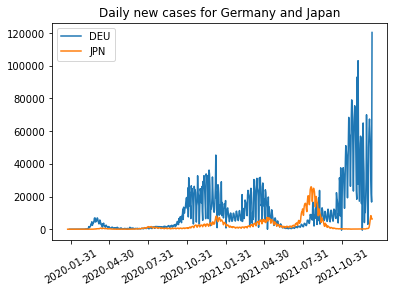

In [129]:
plt.plot(data_new_cases['date'], data_new_cases['DEU'], label='DEU')
plt.plot(data_new_cases['date'], data_new_cases['JPN'], label='JPN')
plt.xticks(pd.date_range('2020-01-22','2022-01-11',freq='3M'))
plt.xticks(rotation=30)
plt.title('Daily new cases for Germany and Japan')
plt.legend(loc="upper left")
plt.show()

As we see above, this graph is not clear to see the trend of the data, we could generally witness that in general, the daily new cases in Germany is higher than in Japan. 
So next we use the data--new cases smoothed. This uses data smoothing, which is an algorithm to remove noise, and make the more represntative information shown up. We could see as following, the daily new cases for Germany and Japan is relatively lower in the time range (2020-01-31 to 2020-07-31) than the time range(2020-07-31 to 2021-10-31). Also, Generally, the daily new cases of Germany is higher than the daily new cases of Japan, except in the time period (2021-04-30 to 2021-07-31). Also, the highest number occurs in 2021 August for Japan, at 25000, and 2021 October for Germany, at 60000. Since 2021 September, we witnessed a surge in the data for Germany, and we could simply predict the trend will be continuous.

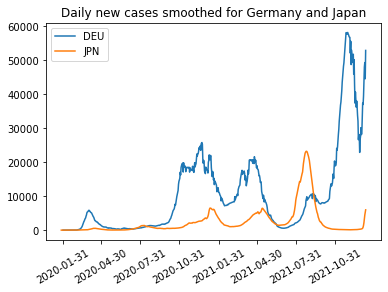

In [130]:
data_new_cases_smoothed = pd.pivot_table(data_new_cases_smoothed, index='date', columns='iso_code')
data_new_cases_smoothed.columns = ['DEU', 'JPN']
data_new_cases_smoothed.reset_index(inplace=True)
data_new_cases_smoothed['date'] = pd.to_datetime(data_new_cases_smoothed['date'])

plt.plot(data_new_cases_smoothed['date'], data_new_cases_smoothed['DEU'], label='DEU')
plt.plot(data_new_cases_smoothed['date'], data_new_cases_smoothed['JPN'], label='JPN')
plt.xticks(pd.date_range('2020-01-22','2022-01-11',freq='3M'))
plt.xticks(rotation=30)
plt.title('Daily new cases smoothed for Germany and Japan')
plt.legend(loc="upper left")
plt.show()

Then we use histogram to see the sistribution of the daily new cases for Germany and Japan respectively. We could see that for Germany, the highest frequency occurs in around 10000 daily new cases; for Japan, the highest frequency occurs in around 2500 daily new cases.

<AxesSubplot:>

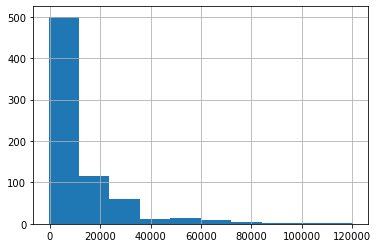

In [131]:
data_new_cases['DEU'].hist(bins=10)

<AxesSubplot:>

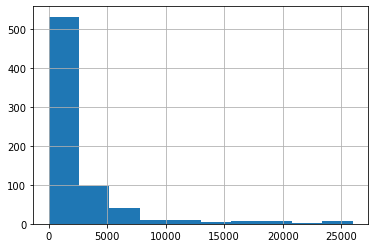

In [132]:
data_new_cases['JPN'].hist(bins=10)

And as i want to evaluate further, i draw the boxplot for these two countries. For both countries, there are a lot of outliers, but clearly, these outliers for Germany have significant higher numbers for Germany. Also, the third quartile of data for Japan is smaller than the median of the data for Germany. The minimun figure for Germany and Japan is similar.

<AxesSubplot:>

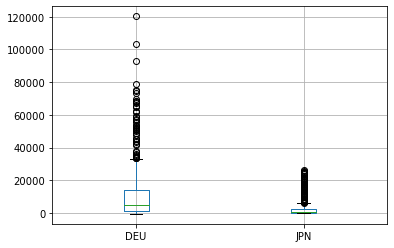

In [133]:
data_new_cases.boxplot()

### Sub research objects:

#### To achieve further understanding and evaluation, next i use some variables besides daily new cases to analyse

Then we evaluate total cases every day first by drawing total cases and total cases/million.

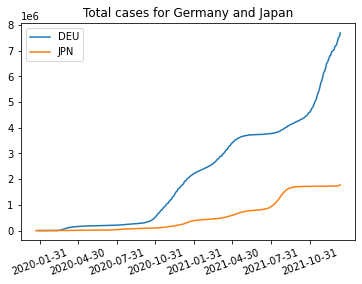

In [134]:
data_total_cases = pd.pivot_table(data_total_cases, index='date', columns='iso_code')
data_total_cases.columns = ['DEU', 'JPN']
data_total_cases.reset_index(inplace=True)
data_total_cases['date'] = pd.to_datetime(data_total_cases['date'])

plt.plot(data_total_cases['date'], data_total_cases['DEU'], label='DEU')
plt.plot(data_total_cases['date'], data_total_cases['JPN'], label='JPN')
plt.xticks(pd.date_range('2020-01-22','2022-01-11',freq='3M'))
plt.xticks(rotation=20)
plt.title('Total cases for Germany and Japan')
plt.legend(loc="upper left")
plt.show()

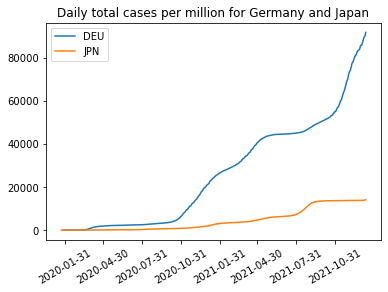

In [135]:
data_total_cases_per_million = pd.pivot_table(data_total_cases_per_million, index='date', columns='iso_code')
data_total_cases_per_million.columns = ['DEU', 'JPN']
data_total_cases_per_million.reset_index(inplace=True)
data_total_cases_per_million['date'] = pd.to_datetime(data_total_cases_per_million['date'])

plt.plot(data_total_cases_per_million['date'], data_total_cases_per_million['DEU'], label='DEU')
plt.plot(data_total_cases_per_million['date'], data_total_cases_per_million['JPN'], label='JPN')
plt.xticks(pd.date_range('2020-01-22','2022-01-11',freq='3M'))
plt.xticks(rotation=30)
plt.title('Daily total cases per million for Germany and Japan')
plt.legend(loc="upper left")
plt.show()

Clearly, we could see both lines show the increasing trend with positive gradient as the daily new cases could not be negative. And the points when the gradient is highest are the exactly the points when daily new cases is highest.

Then to see the daily new cases more clearly, we use the new cases per million and the smoothed data as well, which give me the exactly same results.

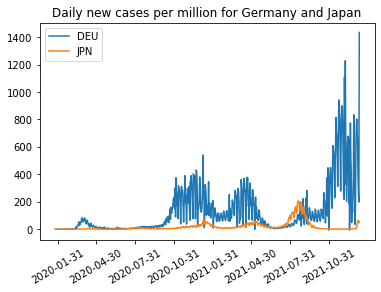

In [136]:
data_new_cases_per_million = pd.pivot_table(data_new_cases_per_million, index='date', columns='iso_code')
data_new_cases_per_million.columns = ['DEU', 'JPN']
data_new_cases_per_million.reset_index(inplace=True)
data_new_cases_per_million['date'] = pd.to_datetime(data_new_cases_per_million['date'])

plt.plot(data_new_cases_per_million['date'], data_new_cases_per_million['DEU'], label='DEU')
plt.plot(data_new_cases_per_million['date'], data_new_cases_per_million['JPN'], label='JPN')
plt.xticks(pd.date_range('2020-01-22','2022-01-11',freq='3M'))
plt.xticks(rotation=30)
plt.title('Daily new cases per million for Germany and Japan')
plt.legend(loc="upper left")
plt.show()

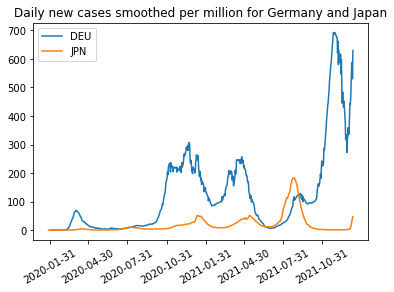

In [137]:
data_new_cases_smoothed_per_million = pd.pivot_table(data_new_cases_smoothed_per_million, index='date', columns='iso_code')
data_new_cases_smoothed_per_million.columns = ['DEU', 'JPN']
data_new_cases_smoothed_per_million.reset_index(inplace=True)
data_new_cases_smoothed_per_million['date'] = pd.to_datetime(data_new_cases_smoothed_per_million['date'])

plt.plot(data_new_cases_smoothed_per_million['date'], data_new_cases_smoothed_per_million['DEU'], label='DEU')
plt.plot(data_new_cases_smoothed_per_million['date'], data_new_cases_smoothed_per_million['JPN'], label='JPN')
plt.xticks(pd.date_range('2020-01-22','2022-01-11',freq='3M'))
plt.xticks(rotation=30)
plt.title('Daily new cases smoothed per million for Germany and Japan')
plt.legend(loc="upper left")
plt.show()

### Possible reasons?

Clearly, the above data tell us the severity of the epidemic is much higher in Germany. So i do the following analysis to test the reasons.

Firstly, i check the reproduction_rate of virus, so called 'R'.

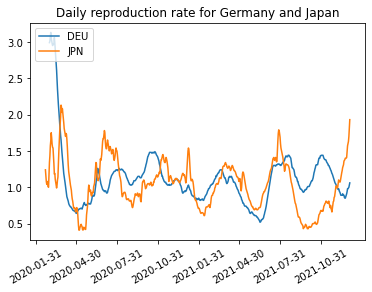

In [138]:
data_reproduction_rate = pd.pivot_table(data_reproduction_rate, index='date', columns='iso_code')
data_reproduction_rate.columns = ['DEU', 'JPN']
data_reproduction_rate.reset_index(inplace=True)
data_reproduction_rate['date'] = pd.to_datetime(data_reproduction_rate['date'])

plt.plot(data_reproduction_rate['date'], data_reproduction_rate['DEU'], label='DEU')
plt.plot(data_reproduction_rate['date'], data_reproduction_rate['JPN'], label='JPN')
plt.xticks(pd.date_range('2020-01-22','2022-01-11',freq='3M'))
plt.xticks(rotation=30)
plt.title('Daily reproduction rate for Germany and Japan')
plt.legend(loc="upper left")
plt.show()

From the graph above, we could simply deduce that the reproduction rate of virus in these two countries are similar, which means the virus in these two countries might be one type. Also, we could see that the figures are fluctuate around 0.5 and 1.75, indicates the reproduction rate of the virus is almost same during the period.


Now we know that the virus might be the same type in these two countries, next, i assume the daily new tests per thousand as one important factor. As the population in these two countries are different, i used per thousand instead of whole. We could see that the daily new tests in Germany is significant higher in Japan, which first could justify the answers we found above that more daily new cases appeared in Germany, second might indicate that as more people did the test, the daily new cases found are higher.

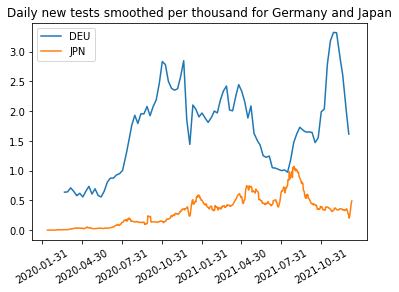

In [139]:
data_new_tests_smoothed_per_thousand = pd.pivot_table(data_new_tests_smoothed_per_thousand, index='date', columns='iso_code')
data_new_tests_smoothed_per_thousand.columns = ['DEU', 'JPN']
data_new_tests_smoothed_per_thousand.reset_index(inplace=True)
data_new_tests_smoothed_per_thousand['date'] = pd.to_datetime(data_new_tests_smoothed_per_thousand['date'])

plt.plot(data_new_tests_smoothed_per_thousand['date'], data_new_tests_smoothed_per_thousand['DEU'], label='DEU')
plt.plot(data_new_tests_smoothed_per_thousand['date'], data_new_tests_smoothed_per_thousand['JPN'], label='JPN')
plt.xticks(pd.date_range('2020-01-22','2022-01-11',freq='3M'))
plt.xticks(rotation=30)
plt.title('Daily new tests smoothed per thousand for Germany and Japan')
plt.legend(loc="upper left")
plt.show()

Finally, i check the stringency index. 

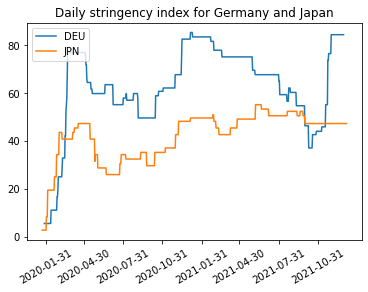

In [140]:
data_stringency_index = pd.pivot_table(data_stringency_index, index='date', columns='iso_code')
data_stringency_index.columns = ['DEU', 'JPN']
data_stringency_index.reset_index(inplace=True)
data_stringency_index['date'] = pd.to_datetime(data_stringency_index['date'])

plt.plot(data_stringency_index['date'], data_stringency_index['DEU'], label='DEU')
plt.plot(data_stringency_index['date'], data_stringency_index['JPN'], label='JPN')
plt.xticks(pd.date_range('2020-01-22','2022-01-11',freq='3M'))
plt.xticks(rotation=30)
plt.title('Daily stringency index for Germany and Japan')
plt.legend(loc="upper left")
plt.show()

We witness that the value is higher for Germany, means that the strategies in Germany is stricter, which indirectly implies the epidemic is more serious in Germany. But this is not enough for solid conclusion, because we could also say that -- the Germany government has more strict strategies, but why the epidemic is worse?  So evaluate further, we found that the reaction of the Germany government is slower than the Japanese government, it usually raise stringency index after the surge of daily new cases.

## Conclusions:

For Task 3, i have 3 conclusions:
1. The epidemic is more serious in Germany in the period according to daily new cases and total cases.
2. The virus in the two countries are similar in the reproduction rate.
3. The government of Germany take slower and harsher strategies to tackle this epidemic.



## Possible improvements:
1. The possible reasons i discussed is partial, if more data are provided, we might found a list of reasons to explain the difference in these two countries.
2. I used the data smoothing in the diagraming, this can be useful for predicting the further trend of the epidemic in different countries.
    

# Conclusions and reflections for the whole project

In this report, i finished 3 tasks by using different concepts in ST101 courses.
1. In Task 1, I first create a dict of list called ‘author_result’ to store the author and his/her collaborators. Then i found there are some similar names in the data, i then modified my program to achieve data cleaning. Then another dict ‘collaborators’ is used to calculate the number of collaborators of each author. Thirdly, a third dict ‘self_and_average_collaborators’ is created to found store the data of the number of each author’s collaborators and average collaborators of each author’s collaborators. This step is for the following evaluation to found whether friendship paradox is observed. The final step, i used for loop to compare the data in the ‘self_and_average_collaborators’. I found the friendship paradox is observed based on my assumption. Also, i used histograms and boxplot to analyse the data.
2. In Task 2, i first created a class called ‘LearningPlayer’ in nim.py that is a inheritance of the ‘Player’, which has the ability to do reinforce learning based on my assumption. Then a function ‘sim_play’ is used in order to play the game for 1000 times. I compare the ability of LearningPlayer with Player first, and i found he/she is more likely to win. However, when i compare LearningPlayer with SmartPlayer, i found he/she could not do as good as SmartPlayer. By doing evaluation about how fast the learning player is learning when playing with Player and how to improve the LearningPlayer to make it win over the SmartPlayer, i make some estimations and assumptions, although a lot of improvements are needed.
3. In Task 3, i do analysis on the data of Covid-19 in two countries(Germany and Japan). By using the form, lie graphs, histograms and a boxplot, i put my importance in the main research subject- daily new cases. Also, to achieve the optimum research, i also study some sub research subjects and found some conclusions. Finally, i evaluate some possible reasons to the difference between the data of Germany and Japan. This evaluation is totally inadequate, a lot of improvements are needed.

In the whole project, i ensure that i use docstring in each function and class created. Also, i apply good error raising and try my best to consider all the possible outcomes. Admittedly, there must be errors, and improvements are needed.

#### Limitations

1. Data in task 1 is really huge and i could not find a way to check for each data and each author to ensure the accuracy.
2. Less of analysis for friendship paradox.
3. The inadequate analysis of LearningPlayer to make it win when playing with SmartPlayer.
4. Almost all diagrams fpr task 3 is line chart .
5. Lack of statistical analysis in task 3
6. Inadequate experience with json and matplotlib library.



#### Improvements:
1. Make more diagrams about the COVID-19 data by applying matplotlib further.
2. Simplify my answer by better use of parameter passing.
3. Improve ‘LearningPlayer’ to achieve better reinforce learning.

# END

#### This is END of project. It is a honor that i got the chance to learn python, and thank you so much for checking my codes.